<a href="https://colab.research.google.com/github/nuvvulapraveen17/MachineLearning-DeepLearning/blob/main/SigmoidExperiment/GenaralizedSigmoid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Setup

In [ ]:
# required libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, log_loss
from tqdm import tqdm_notebook 

# this is used to generate toy dataset
from sklearn.datasets import make_blobs

import warnings
warnings.filterwarnings('ignore')

# Genaralized Sigmoid Neuron Class

This class is extension of the Sigmoid neuron class which i have implemented earlier which now includes the cross entropy loss. for better explanation see the SigmoidNeuron Class notebook in my github repo.

In [ ]:
class SigmoidNeuron:
    
  def __init__(self):
    self.w = None
    self.b = None
    
  def perceptron(self, x):
    return np.dot(x, self.w.T) + self.b
  
  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))
  
  def grad_w_mse(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred) * x
  
  def grad_b_mse(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred)
  
  def grad_w_ce(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    if y == 0:
      return y_pred * x
    elif y == 1:
      return -1 * (1 - y_pred) * x
    else:
      raise ValueError("y should be 0 or 1")
    
  def grad_b_ce(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    if y == 0:
      return y_pred 
    elif y == 1:
      return -1 * (1 - y_pred)
    else:
      raise ValueError("y should be 0 or 1")
  
  def fit(self, X, Y, epochs=1, learning_rate=1, initialise=True, loss_fn="mse", display_loss=False):
    
    # initialise w, b
    if initialise:
      self.w = np.random.randn(1, X.shape[1])
      self.b = 0
      
    if display_loss:
      loss = {}
    
    for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      dw = 0
      db = 0
      for x, y in zip(X, Y):
        if loss_fn == "mse":
          dw += self.grad_w_mse(x, y)
          db += self.grad_b_mse(x, y) 
        elif loss_fn == "ce":
          dw += self.grad_w_ce(x, y)
          db += self.grad_b_ce(x, y)
          
      m = X.shape[1]  
      self.w -= learning_rate * dw/m
      self.b -= learning_rate * db/m
      
      if display_loss:
        Y_pred = self.sigmoid(self.perceptron(X))
        if loss_fn == "mse":
          loss[i] = mean_squared_error(Y, Y_pred)
        elif loss_fn == "ce":
          loss[i] = log_loss(Y, Y_pred)
    
    if display_loss:
      plt.plot(np.array(list(loss.values())).astype(float))
      plt.xlabel('Epochs')
      if loss_fn == "mse":
        plt.ylabel('Mean Squared Error')
      elif loss_fn == "ce":
        plt.ylabel('Log Loss')
      plt.show()
      
  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.sigmoid(self.perceptron(x))
      Y_pred.append(y_pred)
    return np.array(Y_pred)

In [ ]:
# These colors we will use later for plotting data purpose
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","yellow","green"])

In [ ]:
np.random.seed(0)

# Generating Data

**To generate a data, we use make_blobs method from sklearn**<br> It's used for generateing lots of data for ML models. it takes inputs as<br>
(i) number of samples<br>
(ii) no.of input features(parameters, n_features)<br>
(iii) centres indicate how many clusters of data we need<br>
(iv) random_state to replicate the same results every time(repetable)<br>
it gives us data -> total data only input<br>
labels -> output(y) for the data<br>

These generated datasets are good for better understanding of our alorithm to visualize.

In [ ]:
data, labels = make_blobs(n_samples=1000, centers=4, n_features=2, random_state=0)
print(data.shape, labels.shape)

(1000, 2) (1000,)


**Lets Plot the data**<br>
From above the shape of data indicates we have 1000 examples with 2 features<br>
The labels is same 1000 rows and 1 column(y)<br>
If we plot the data we can plot features on x and y axis and color indicates the class.<br>
c is color so for each data points(each cluster) will get one among our cmap colors.

**Note: We have used centres = 4 during data generation which produces 4 classes**<br>
This is done intentionally to use the same data set for Multiclass Classification for later Notebooks on FFN for Multiclass classification(Will be updated later). 

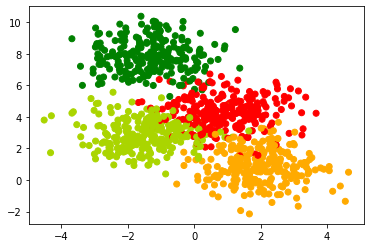

In [ ]:

plt.scatter(data[:,0], data[:,1], c=labels, cmap=my_cmap)
plt.show()

# we can observe from the graph what does it mean by centre=4(clusters) in make_blobs

**Q) How can we convert this to 2 clusters from 4 clusters ?**<br>
We will use a simple modulus property on y(labels) -> (y%2) This will results our labels to simply 2 classes.<br>
after modification the labels(0, 1, 2, 3) become into 2 classes(0, 1)


In [ ]:
labels_orig = labels
labels = np.mod(labels_orig, 2)

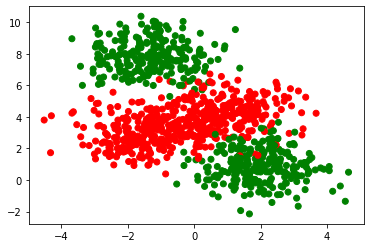

In [ ]:
#lets plot them after modification
plt.scatter(data[:,0], data[:,1], c=labels, cmap=my_cmap)
plt.show()

**Train Test split**<br>
We will use sklearn library for this purpose because its gives better data split by using stratify rather than we just shuffle data and split it.<br>

**Note**
If you dont want to use sklearn train-test-split you can refer previous colab notebook in my github repo for manual train-test-split.<br>

**Note**<br>
Strarify will always be done on categorical values rather than on continous values/features.

In [ ]:
# we will stratify based on labels
X_train, X_val, Y_train, Y_val = train_test_split(data, labels, stratify=labels, random_state=0)
print(X_train.shape, X_val.shape)

(750, 2) (250, 2)


# SN Classification - Training

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:49: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


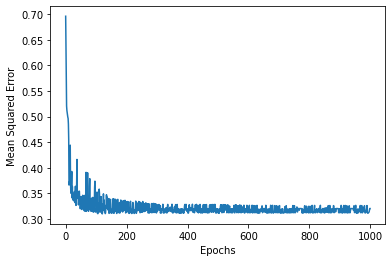

In [ ]:
# lets train the data with sigmoid class
sn = SigmoidNeuron()
sn.fit(X_train, Y_train, epochs=1000, learning_rate=1, display_loss=True)

**Observation from Loss Curve:**<br>
From the Loss/ error graph, the loss is reducing drastically but we can see a lot of oscillations but more or less it gets saturated.<br>

These oscilations indicates that the learning rate is high because when we reach to local minimum our gradient descent algorithm makes larger step which makes our loss to fluctuate to and forth around the optimim loss.

we can try using a smaller learning rate(0.5).

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:49: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


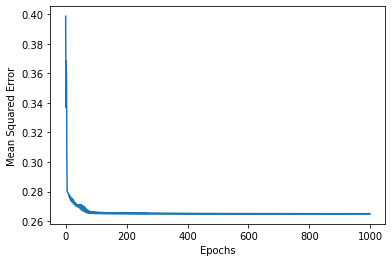

In [ ]:
sn = SigmoidNeuron()
sn.fit(X_train, Y_train, epochs=1000, learning_rate=0.5, display_loss=True)

**Observations:**<br>

From the loss curve we are able to achieve accuracy of ~ 0.75. there is no scope for further improvement with sigmoid class as the loss is saturated.

In [ ]:
# lets predict the values using model
# we need to binarise for accuracy calculation with threshold of 0.5
# calculate the accuracy score using sklearn metrics
Y_pred_train = sn.predict(X_train)
Y_pred_binarised_train = (Y_pred_train >= 0.5).astype("int").ravel()
Y_pred_val = sn.predict(X_val)
Y_pred_binarised_val = (Y_pred_val >= 0.5).astype("int").ravel()
accuracy_train = accuracy_score(Y_pred_binarised_train, Y_train)
accuracy_val = accuracy_score(Y_pred_binarised_val, Y_val)

print("Training accuracy", round(accuracy_train, 2))
print("Validation accuracy", round(accuracy_val, 2))

Training accuracy 0.73
Validation accuracy 0.71


**Observation:**
we got aroung 0.73 train set accuracy & 0.71 for test set accuracy.

As we are dealing with binary classification, if we use dummy model the accuracy will be ~ 0.5, so our model is doing better than dummy model but 0.73 is not up to the mark for satisfaction.

**Note:**<br>
**Dummy Model:** dummy model means no matter which data point we ask to predict it will always predict only one class out of two classes.<br>
it can be either 1 or 2 -> so dummy model accuracy will be ~0.5(because of stratify)

#Better visualization of predicted results

As we have build our model with 0.73 accuracy<br>
lets plot the data with labels predicted by model. This gives us an idead of how label is predicting weather its correct or wrong by how much persent.<br>

**It also show that we can take a random point and see the ground truth and model prediction.**<br>

**Argument $s$ in scatter plot indicates the size of each point that shows in plot size.**<br>

**in our case we defined it as difference between ground truth and model prediction and its absolute value with some scaling(15) and offset(0.2) if it matches correctly it gives zero but we have offset(o.2)*15 = 3 of size if it not matches then we will see its gives abs value 1(bcoz of binary) so it will give us 15*(1+0.2) = 18 of size small points are for which model are predicting correctly.**

large points are wrongly classified

In total we got a plot of 4-dimensions(yehh... higher dimensions in 2D plots)<br>
x1 feature and x2 feature as 2 dimensions<br>
class (color green or red ) as 3 dimension<br>
size of points tells us the weather we are coreectly predicting (4-dim)

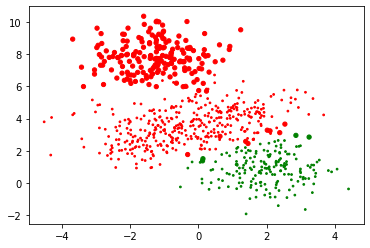

In [ ]:
plt.scatter(X_train[:,0], X_train[:,1], c=Y_pred_binarised_train, cmap=my_cmap, s=15*(np.abs(Y_pred_binarised_train-Y_train)+.2))
plt.show()

**observation:**<br>
**Q)** Even though sigmoid is a binary classification algorithm, but it is not able to perform very well in our dataset(From above plot) why?

**This is because the data is not linearly separable. and sigmoid neuron performs well only on linearly separable data**

# Using Cross entropy loss

Earlier we have used mean squared error loss lets try cross entropy loss.

In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(data, labels, stratify=labels, random_state=0)
print(X_train.shape, X_val.shape)

(750, 2) (250, 2)


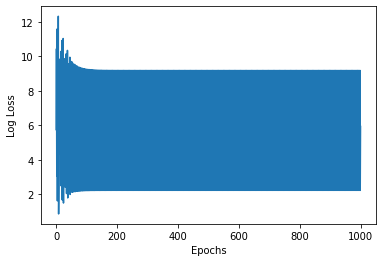

In [ ]:
sn = SigmoidNeuron()
sn.fit(X_train, Y_train, epochs=1000, learning_rate=0.01, loss_fn="ce", display_loss=True)

In [ ]:
# lets predict the values using model
# we need to binarise for accuracy calculation with threshold of 0.5
# calculate the accuracy score using sklearn metrics
Y_pred_train = sn.predict(X_train)
Y_pred_binarised_train = (Y_pred_train >= 0.5).astype("int").ravel()
Y_pred_val = sn.predict(X_val)
Y_pred_binarised_val = (Y_pred_val >= 0.5).astype("int").ravel()
accuracy_train = accuracy_score(Y_pred_binarised_train, Y_train)
accuracy_val = accuracy_score(Y_pred_binarised_val, Y_val)

print("Training accuracy", round(accuracy_train, 2))
print("Validation accuracy", round(accuracy_val, 2))

Training accuracy 0.5
Validation accuracy 0.49


**Observation:**
From loss curve of cross entropy it might be due to Non-standardisation of our data set.

**Lets Normalise the data and apply it.**

In [ ]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

In [ ]:
X_scaled_train = scalar.fit_transform(X_train)
X_scaled_test = scalar.transform(X_val)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
minmax_scalar = MinMaxScaler()

In [ ]:
Y_scaled_train = minmax_scalar.fit_transform(Y_train.reshape(-1,1))

In [ ]:
Y_scaled_test = minmax_scalar.transform(Y_val.reshape(-1,1))

In [ ]:
threshold = 0.5
scaled_threshold = minmax_scalar.transform(np.array([threshold]).reshape(1,-1))

In [ ]:
scaled_threshold = list(minmax_scalar.transform(np.array([threshold]).reshape(1,-1)))[0][0]

In [ ]:
scaled_threshold

0.5

In [ ]:
Y_binarised_train = (Y_scaled_train > scaled_threshold)

In [ ]:
Y_binarised_train = (Y_scaled_train > scaled_threshold).astype('int')

In [ ]:
Y_binarised_train = (Y_scaled_train > scaled_threshold).astype('int').ravel()

In [ ]:
Y_binarised_test = (Y_scaled_test > scaled_threshold).astype('int').ravel()

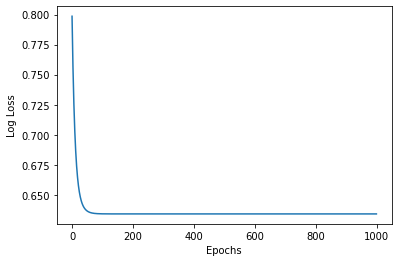

In [ ]:
sn = SigmoidNeuron()
sn.fit(X_scaled_train, Y_scaled_train, epochs=1000, learning_rate=0.001, loss_fn="ce", display_loss=True)

In [ ]:
Y_pred_train = sn.predict(X_scaled_train)
Y_pred_test = sn.predict(X_scaled_test)

Y_pred_binarised_train = (Y_pred_train > scaled_threshold).astype('int').ravel()
Y_pred_binarised_test = (Y_pred_test > scaled_threshold).astype('int').ravel()

accuracy_train = accuracy_score(Y_pred_binarised_train, Y_binarised_train)
accuracy_test = accuracy_score(Y_pred_binarised_test, Y_binarised_test)

print(accuracy_train, accuracy_test)

0.6386666666666667 0.572


**Observation:**<br>
Even though we are using cross entropy loss still we are getting lesser accuracy in comparision to MSE, it might be due to Non-linear data.<br>

I do don't know the exact reason for this, still searching in the dark.

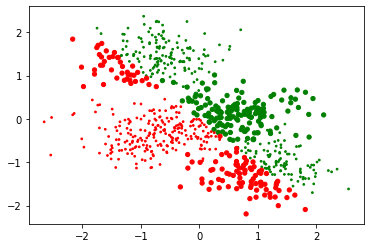

In [ ]:
# lets plot
plt.scatter(X_scaled_train[:,0], X_scaled_train[:,1], c=Y_pred_binarised_train, cmap=my_cmap, s=15*(np.abs(Y_pred_binarised_train-Y_train)+.2))
plt.show()

**Interesting to see this, its acting like a dummy model.**<br>

If you know why, reply me with a msg.

Thanks.